In [1]:
from mainfunctions import *

In [2]:
rgb_img = imageio.imread("action_man_no_white.png")
volume_properties=[]


Hue Peaks:  [ 9231.39449817 16429.48953517  1137.88549086   599.72599651
   258.47953468    99.24860898   630.70602007   117.52680273
   436.64078623   121.03999746   394.84317198  1132.15058428
 14045.17498188   371.46881676   372.64266736   306.2921008 ]


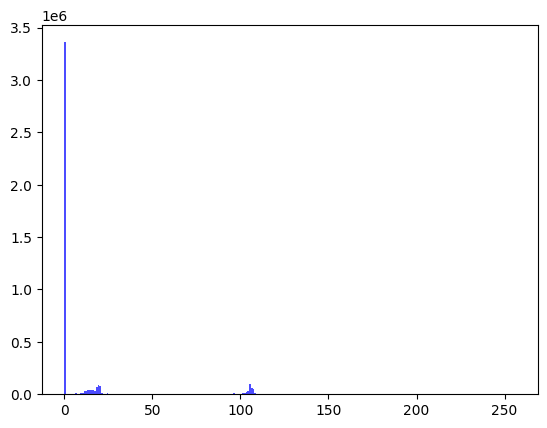

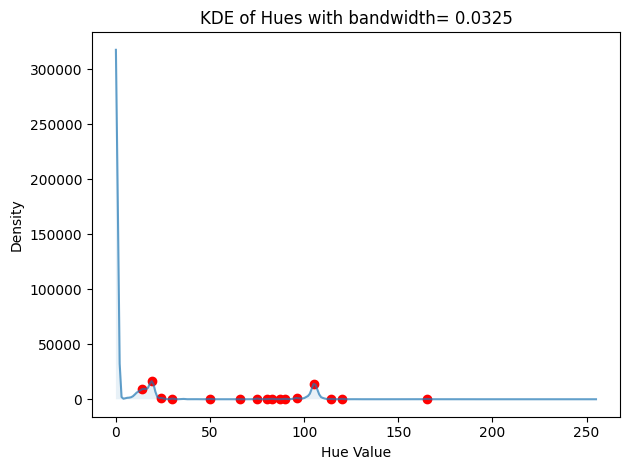

: 

In [4]:
hsv_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2HSV)

pixel_total= hsv_img.shape[0]*hsv_img.shape[1]

total_pixels_img= count_pixels(hsv_img)

# extract and Flatten the hue channel
hue_channel = hsv_img[:,:,0]
hue_values = hue_channel.flatten()

def calc_hue_kdes(hue_values, total_pixels_img, bandwidth=0.5):
    plt.figure()  
    histogram= plt.hist(hue_values, bins=256, range=[0, 256], color='blue', alpha=0.7)

    # Calculate the KDE (Kernel Density Estimation) of hues
    kde = gaussian_kde(hue_values, bw_method=bandwidth)

    # Plot the KDE
    x_vals = np.linspace(0, 255, 1000)
    x_integers = np.arange(0, 256)
    peaks,fp_scipy = find_peaks(kde(x_vals), distance=7)
    for peakindex in range(len(peaks)):
        peaks[peakindex]= peaks[peakindex]*(256/1000)
    peaks= remove_small_peaks(histogram[0],peaks, total_pixels_img*0.001)
    kde_histogram=  kde(x_integers)*total_pixels_img
   
    n_left_of_peak, n_right_of_peak, l_bases, r_bases = n_pixels_of_peak( kde_histogram, peaks) 
    new_left_bases, new_right_bases= new_bases(histogram[1], peaks, n_left_of_peak, n_right_of_peak, l_bases, r_bases)
    # Plot the histogram
    plt.figure()
    plt.plot(x_integers, kde_histogram, alpha=0.7)
    plt.fill_between(x_integers, 0, kde_histogram,alpha=0.1)
    plt.scatter(peaks, kde_histogram[peaks], color='red')
    print("Hue Peaks: ", kde_histogram[peaks])

    return peaks, new_left_bases, new_right_bases


bandwidths= [0.0325]
for bandwidth in bandwidths:
    hue_peaks, left_bases, right_bases= calc_hue_kdes(hue_values, total_pixels_img, bandwidth)

    plt.title('KDE of Hues with bandwidth= '+ str(bandwidth))
    plt.xlabel('Hue Value')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()